In [30]:
# name : dabhi nihar
# enrol no : 191310132038
#section : a3
# branch : ict




# project :- car prediction using linear regression

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import  metrics

In [32]:
car_data = pd.read_csv('car data.csv')

In [33]:
car_data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [34]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [35]:
car_data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [36]:
fuel_type = car_data['Fuel_Type']
seller_type = car_data['Seller_Type']
transmission_type = car_data['Transmission']
selling_price = car_data['Selling_Price']

In [37]:
from matplotlib import style

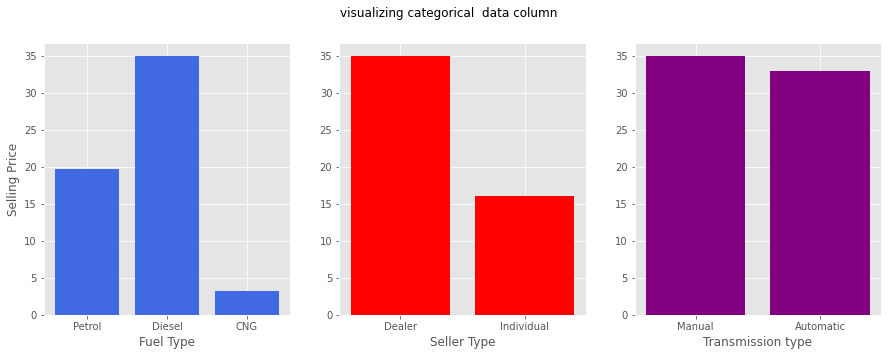

In [41]:
style.use('ggplot')
fig = plt.figure(figsize=(15,5))
fig.suptitle('visualizing categorical  data column')
plt.subplot(1,3,1)
plt.bar(fuel_type, selling_price, color='royalblue')

plt.xlabel("Fuel Type")
plt.ylabel("Selling Price")
plt.subplot(1,3,2)
plt.bar(seller_type, selling_price, color='red')
plt.xlabel("Seller Type")
plt.subplot(1,3,3)
plt.bar(transmission_type, selling_price, color='purple')
plt.xlabel('Transmission type')
plt.show()


<AxesSubplot:xlabel='Transmission', ylabel='Selling_Price'>

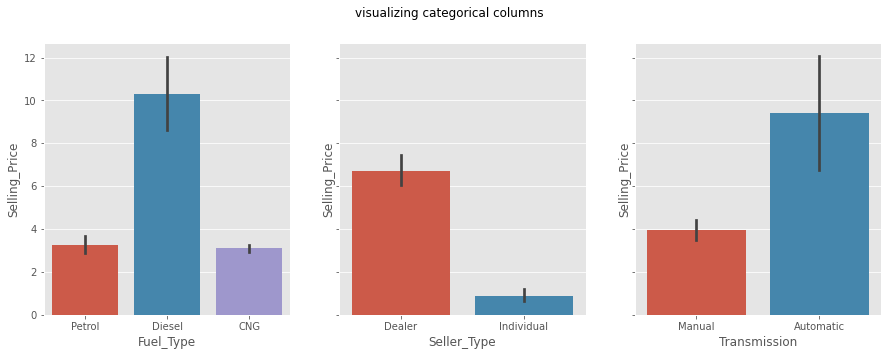

In [42]:
fig, axes = plt.subplots(1, 3, figsize=(15,5), sharey=True)
fig.suptitle('visualizing categorical columns')
sns.barplot(x=fuel_type, y=selling_price, ax=axes[0])
sns.barplot(x=seller_type, y=selling_price, ax=axes[1])
sns.barplot(x=transmission_type, y=selling_price, ax=axes[2])


In [43]:
petrol_data = car_data.groupby('Fuel_Type').get_group('Petrol')
petrol_data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,239.000000,239.000000,239.000000,239.000000,239.000000
mean,2013.539749,3.264184,5.583556,33528.937238,0.050209
std,3.042674,3.135537,5.290685,40308.984886,0.270368
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.600000,0.940000,13850.000000,0.000000
50%,2014.000000,2.650000,4.600000,25870.000000,0.000000
75%,2016.000000,5.200000,7.980000,44271.000000,0.000000
max,2017.000000,19.750000,23.730000,500000.000000,3.000000


In [44]:
car_data.replace({'Fuel_Type':{'Petrol':0, 'Diesel':1, 'CNG':2}}, inplace=True)
car_data = pd.get_dummies(car_data, columns=['Seller_Type', 'Transmission'], drop_first=True)


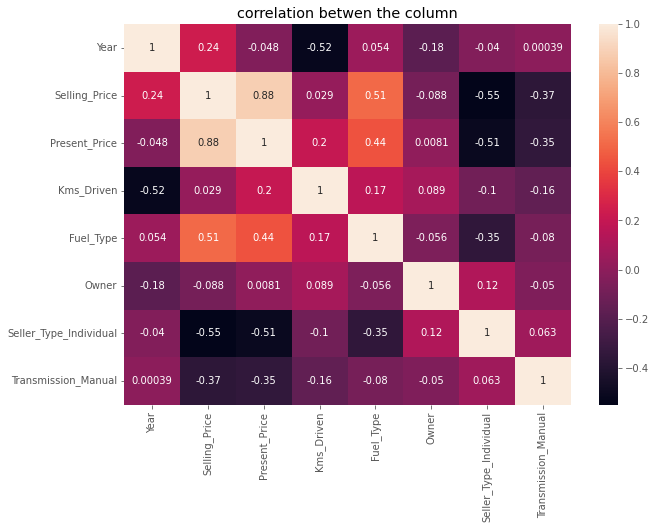

In [45]:
plt.figure(figsize=(10,7))
sns.heatmap(car_data.corr(), annot=True)
plt.title('correlation betwen the column')
plt.show()

<AxesSubplot:title={'center':'correlation between present price and selling price'}, xlabel='Present_Price', ylabel='Selling_Price'>

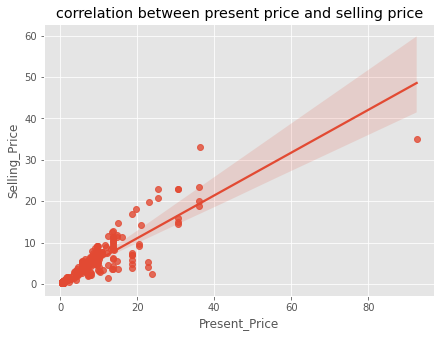

In [46]:
fig = plt.figure(figsize=(7,5))
plt.title('correlation between present price and selling price')
sns.regplot(x='Present_Price', y='Selling_Price', data=car_data)


In [47]:
X = car_data.drop(['Car_Name', 'Selling_Price'], axis=1)
y = car_data['Selling_Price']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)


In [49]:
scaler = StandardScaler()

In [50]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)



In [51]:
model = LinearRegression()

In [52]:
model.fit(X_train, y_train)

LinearRegression()

In [53]:
pred = model.predict(X_test)

In [54]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [55]:
print("MAE: ", (metrics.mean_absolute_error(pred, y_test)))
print("MSE: ", (metrics.mean_squared_error(pred, y_test)))
print("r2_score: ", (metrics.r2_score(pred, y_test)))


MAE:  1.2319533008766872
MSE:  3.4579538458337926
r2_score:  0.8528582949898234


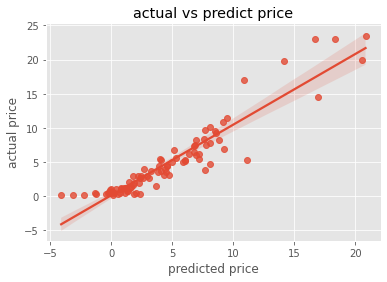

In [56]:
sns.regplot(x=pred, y=y_test)
plt.xlabel("predicted price")
plt.ylabel("actual price")
plt.title("actual vs predict price")
plt.show()